In [1]:
from manim import *
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching et2_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s et2_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.11


In [42]:
# grouping legend
#
# 0 - graphs
# 1 - x_axis_tick_labels
# 2 - y_axis_tick_labels
# 3 - x_axis_labels
# 4 - y_axis_labels
#


# view data
physics_view_data = [
    (-1, 3),
    (-1, 3),
    (-1, 3),
    (-1, 3),
    (-1, 2),
    (0, 4),
    (0, 4),
    (0, 5),
    (8, 8),
    (9, 8),
    (10, 8),
    (9, 9),
    (10, 9),
    #(10, 8),
    (9, 9),
    (10, 9),
    (9, 8),
    (9, 8),
    (11, 0),
    (12, 0),
    (12, 0),
    (12, 0),
    (-1, 8),
    (-1, 8),
    (-1, 8),
    (-1, 9),
    (-1, 9),
    (0, 8),
    (9, -1),
    (9, -1),
    (9, 0),
    (9, 0),
    (9, -1),
    (10, -1),
    (9, 0),
    (10, 0),
]


economics_view_data = [
    (6, 5),
    (2, 5),
    (0, 3),
    (0, 1),
    (3, 5),
    (6, 5),
    (1, 5),
    (1, 4),
    (5, -1),
    (3, -1),
    (6, 4),
    (0, 5),
    (1, 3),
    (2, 5),
    (-1, 2),
    (-1, 3),
    (-1, 3),
    (-1, 4),
    (-1, 6),
    (-1, 6),
    (-1, 1),
]


economics_alt_view_data = [
    (6, 5),
    (0, 11),
    (0, 11),
    (0, 11),
    (0, 11),
    (4, 5+6),
    (0, 3+4),
    (0, 1+4),
    (5, 5+6),
    (5, 5+6),
    (5, 5+6),
    (1, 5+6),
    (1, 5+6),
    (6, 5),
    (1, 5+4),
    (1, 4+4),
    (5, -1),
    (3, -1),
    (6, 4+4),
    (0, 5+4),
    (1, 3+4),
    (2, 5+4),
    (-1, 2),
    (-1, 3),
    (-1, 3),
    (-1, 4),
    (-1, 6),
    (-1, 6),
    (-1, 1),
]

Output saved by overwring previous file at animations/eye_tracking_2/eye_tracking_2.mp4.


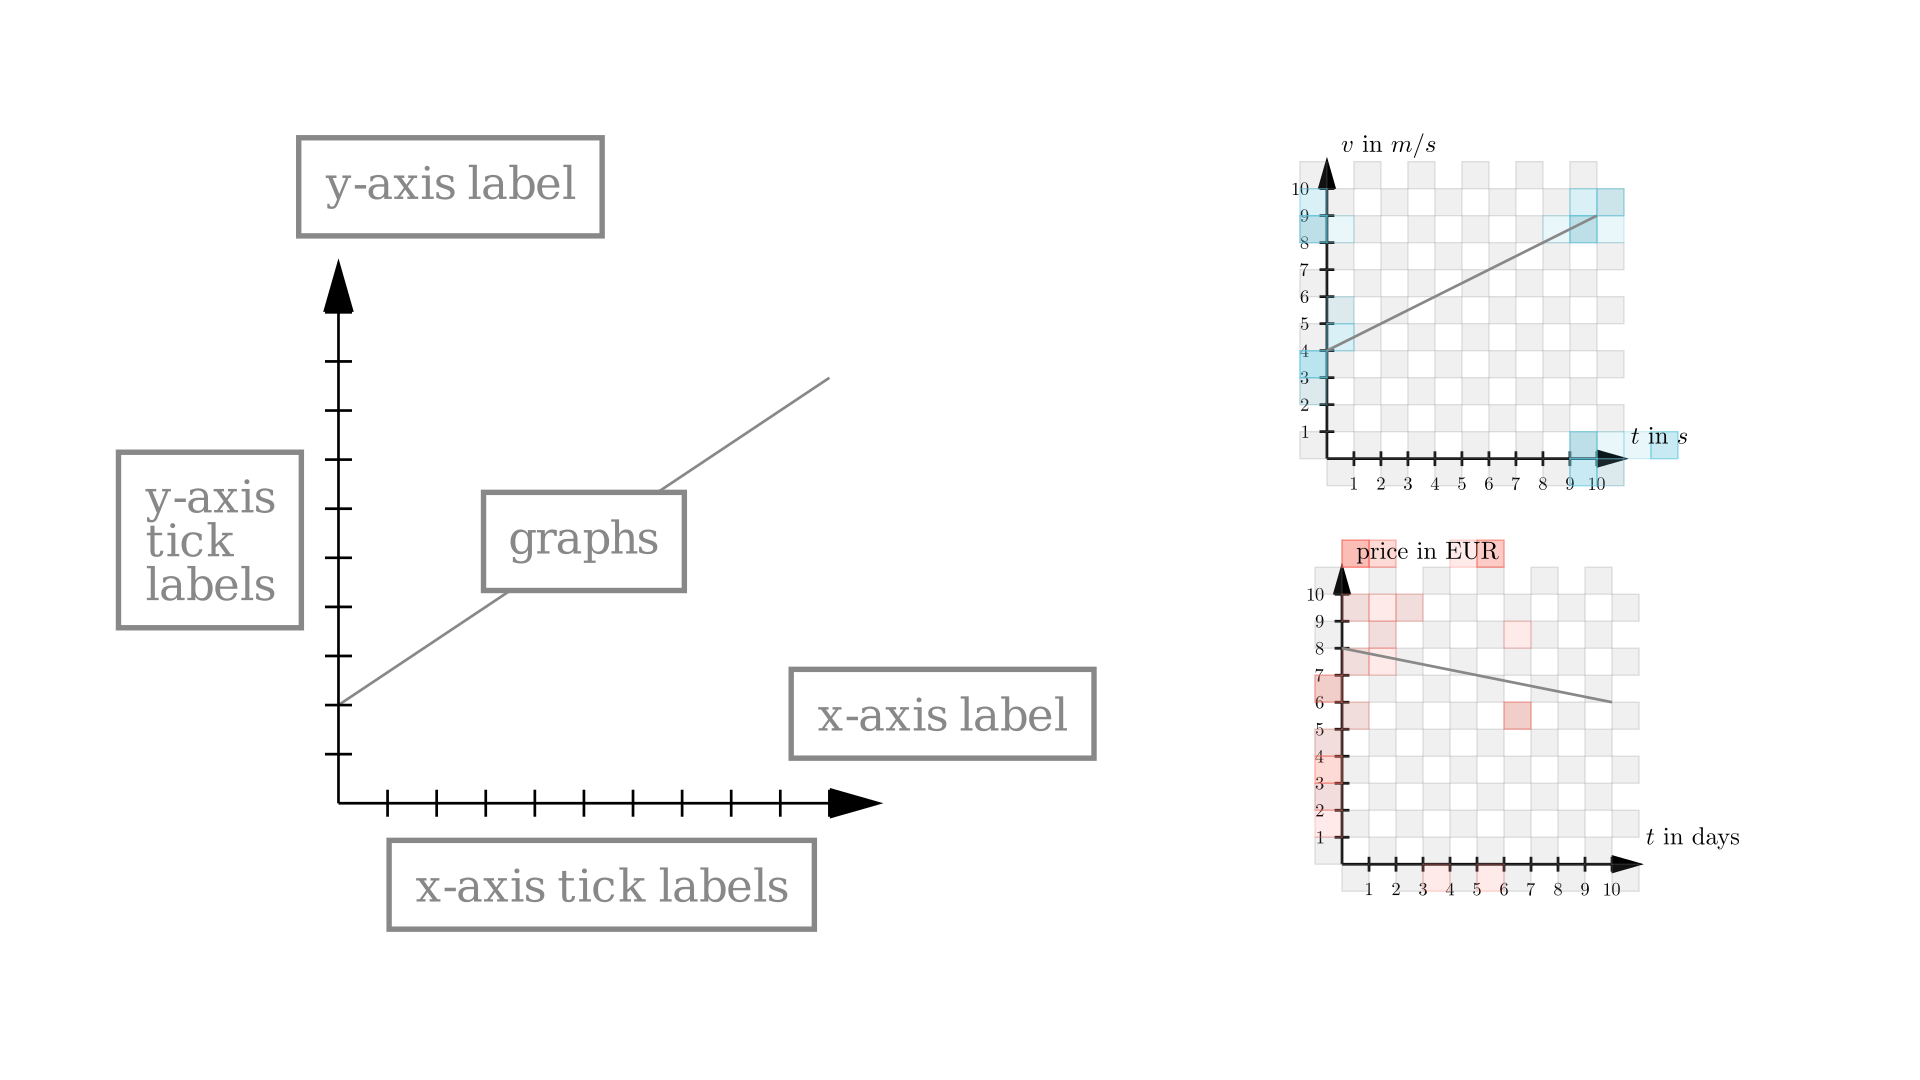

In [43]:
%%capture_video --path "animations/eye_tracking_2/eye_tracking_2.mp4"
%%manim -qh --fps 60 $video_scene


class et2_Scene(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        x_range = [0, 11, 1]
        y_range = [0, 11, 1]

        ax1_base = np.array([-4, 0, 0])
        ax2_base = np.array([3, 0, 0])
        shift_distance = abs(ax1_base[0] - ax2_base[0])
        diff_scale = 0.5
        ax_merge_base = np.array([-0.5, 0, 0])


        # description headline
        text_a = Tex(r'Physics students', font_size = 32, color = BLACK).move_to(ax1_base + 3.25*UP)
        text_b = Tex(r'Economics students', font_size = 32, color = BLACK).move_to(ax2_base + 3.25*UP)
        text_a_square = Square(color = BLUE, fill_opacity = 0.5, stroke_opacity = 1, side_length = 0.4, stroke_width = 2).next_to(text_a, LEFT)
        text_b_square = Square(color = RED, fill_opacity = 0.5, stroke_opacity = 1, side_length = 0.4, stroke_width = 2).next_to(text_b, LEFT)
        

        # same type axes
        ax1_ax = Axes(x_range = x_range, y_range = y_range, x_length = 4, y_length = 4, axis_config = {"font_size": 24, "tip_width": 0.2}).add_coordinates().move_to(ax1_base).set_color(BLACK)
        ax1_xlabel = ax1_ax.get_x_axis_label(Tex(r"$t$ in $s$", color = BLACK, font_size = 32))
        ax1_ylabel = ax1_ax.get_y_axis_label(Tex(r"$v$ in $m/s$", color = BLACK, font_size = 32))
        ax1_alt_xlabel = ax1_ax.get_x_axis_label(Tex(r"$t$ in $months$", color = BLACK, font_size = 32))
        ax1_alt_ylabel = ax1_ax.get_y_axis_label(Tex(r"$price$ in $EUR$", color = BLACK, font_size = 32))
        ax1_func = ax1_ax.plot(lambda x_var: x_var / 2 + 4, color = GREY, stroke_width = 2, stroke_opacity = 1, x_range = [0, 10])
        ax1 = VGroup(ax1_ax, ax1_xlabel, ax1_ylabel, ax1_func)

        ax2_ax = Axes(x_range = x_range, y_range = y_range, x_length = 4, y_length = 4, axis_config = {"font_size": 24, "tip_width": 0.2, "tip_length": 9999999}).add_coordinates().move_to(ax2_base).set_color(BLACK)
        ax2_xlabel = ax2_ax.get_x_axis_label(Tex(r"$t$ in $s$", color = BLACK, font_size = 32))
        ax2_ylabel = ax2_ax.get_y_axis_label(Tex(r"$v$ in $m/s$", color = BLACK, font_size = 32))
        ax2_func = ax2_ax.plot(lambda x_var: x_var / 2 + 4, color = GREY, stroke_width = 2, stroke_opacity = 1, x_range = [0, 10])
        ax2_alt_ylabel = ax2_ax.get_y_axis_label(Tex(r"price in EUR", color = BLACK, font_size = 32))
        ax2_alt_xlabel = ax2_ax.get_x_axis_label(Tex(r"$t$ in days", color = BLACK, font_size = 32))
        ax2_alt_func = ax2_ax.plot(lambda x_var: 8 - 1/5*x_var, color = GREY, stroke_width = 2, stroke_opacity = 1, x_range = [0, 10])
        ax2 = VGroup(ax2_ax, ax2_xlabel, ax2_ylabel)


        # diff type axes
        ax1_sr_ax = Axes(x_range = x_range, y_range = y_range, x_length = 4, y_length = 4, axis_config = {"font_size": 24, "tip_width": 0.2}).add_coordinates().move_to(ax1_base).set_color(BLACK)
        ax1_sr_xlabel = ax1_sr_ax.get_x_axis_label(Tex(r"$t$ in $s$", color = BLACK, font_size = 32))
        ax1_sr_ylabel = ax1_sr_ax.get_y_axis_label(Tex(r"$v$ in $m/s$", color = BLACK, font_size = 32))
        ax1_sr_alt_xlabel = ax1_sr_ax.get_x_axis_label(Tex(r"$t$ in $months$", color = BLACK, font_size = 32))
        ax1_sr_alt_ylabel = ax1_sr_ax.get_y_axis_label(Tex(r"$price$ in $EUR$", color = BLACK, font_size = 32))
        ax1_sr_func = ax1_sr_ax.plot(lambda x_var: x_var / 2 + 4, color = GREY, stroke_width = 2, stroke_opacity = 1, x_range = [0, 10])
        ax1_sr = VGroup(ax1_sr_ax, ax1_sr_xlabel, ax1_sr_ylabel, ax1_sr_func)

        ax2_sr_ax = Axes(x_range = x_range, y_range = y_range, x_length = 4, y_length = 4, axis_config = {"font_size": 24, "tip_width": 0.2, "tip_length": 9999999}).add_coordinates().move_to(ax2_base).set_color(BLACK)
        ax2_sr_xlabel = ax2_sr_ax.get_x_axis_label(Tex(r"$t$ in $s$", color = BLACK, font_size = 32))
        ax2_sr_ylabel = ax2_sr_ax.get_y_axis_label(Tex(r"$v$ in $m/s$", color = BLACK, font_size = 32))
        ax2_sr_func = ax2_sr_ax.plot(lambda x_var: x_var / 2 + 4, color = GREY, stroke_width = 2, stroke_opacity = 1, x_range = [0, 10])
        ax2_sr_alt_ylabel = ax2_sr_ax.get_y_axis_label(Tex(r"price in EUR", color = BLACK, font_size = 32))
        ax2_sr_alt_xlabel = ax2_sr_ax.get_x_axis_label(Tex(r"$t$ in days", color = BLACK, font_size = 32))
        ax2_sr_alt_func = ax2_sr_ax.plot(lambda x_var: 8 - 1/5*x_var, color = GREY, stroke_width = 2, stroke_opacity = 1, x_range = [0, 10])
        ax2_sr = VGroup(ax2_sr_ax, ax2_sr_xlabel, ax2_sr_ylabel)


        # merge axis with descriptions
        ax_merge_ax = Axes(x_range = x_range, y_range = y_range, x_length = 4, y_length = 4, axis_config = {"font_size": 24, "tip_width": 0.2, "tip_length": 9999999}).move_to(ax_merge_base).set_color(BLACK)
        ax_merge_xlabel = ax_merge_ax.get_x_axis_label(Tex(r"$t$ in $s$", color = BLACK, font_size = 32))
        ax_merge_ylabel = ax_merge_ax.get_y_axis_label(Tex(r"$v$ in $m/s$", color = BLACK, font_size = 32))
        ax_merge_func = ax_merge_ax.plot(lambda x_var: x_var / 1.5 + 2, color = GREY, stroke_width = 2, stroke_opacity = 1, x_range = [0, 10])
        ax_merge_func.z_index = -5

        ax_merge_xlabel_text = Text(r"x-axis label", color = GREY, font_size = 24).move_to(ax_merge_xlabel.get_center() + 0.35*UP)
        ax_merge_xlabel_text_box = SurroundingRectangle(ax_merge_xlabel_text, buff = .2, color = GREY)
        ax_merge_ylabel_text = Text(r"y-axis label", color = GREY, font_size = 24).move_to(ax_merge_ylabel.get_center() + 0.35*UP)
        ax_merge_ylabel_text_box = SurroundingRectangle(ax_merge_ylabel_text, buff = .2, color = GREY)
        ax_merge_func_text = Text(r"graphs", color = GREY, font_size = 24).move_to(ax_merge_func.get_center())
        ax_merge_func_text.z_index = -1
        ax_merge_func_text_box = SurroundingRectangle(ax_merge_func_text, fill_color = WHITE, fill_opacity = 1, buff = .2, color = GREY)
        ax_merge_func_text_box.z_index = -3
        ax_merge_xtick_labels_text = Text(f"x-axis tick labels", color = GREY, font_size = 24).next_to(ax_merge_ax, 1.5*DOWN)
        ax_merge_ytick_labels_text = Text(f"y-axis\ntick\nlabels", color = GREY, font_size = 24).next_to(ax_merge_ax, 1.5*LEFT)
        ax_merge_xtick_labels_text_box = SurroundingRectangle(ax_merge_xtick_labels_text, buff = .2, color = GREY)
        ax_merge_ytick_labels_text_box = SurroundingRectangle(ax_merge_ytick_labels_text, buff = .2, color = GREY)
        ax_merge = VGroup(
            ax_merge_ax, 
            ax_merge_xlabel_text, ax_merge_ylabel_text, ax_merge_func_text, ax_merge_xtick_labels_text, ax_merge_ytick_labels_text,
            ax_merge_xlabel_text_box, ax_merge_ylabel_text_box, ax_merge_func_text_box, ax_merge_xtick_labels_text_box, ax_merge_ytick_labels_text_box)


        # square function
        def get_color_square(ax, x, y, square_color):
            square_side_length = (ax.c2p(1, 0, 0) - ax.c2p(0, 0, 0))[0]
            return Square(color = square_color, fill_opacity = 0.125, stroke_opacity = 0.25, side_length = square_side_length, stroke_width = 1).move_to(ax.c2p(int(x) + 0.5, int(y) + 0.5, 0))

        
        # square-to-group function
        def square_to_group(square, square_color, ax_merge_box):
            return SurroundingRectangle(ax_merge_box, buff = 0.2, color = square_color, fill_opacity = 0.125, stroke_opacity = 0.25)


        # grey squares for both axes
        ax1_square_group = VGroup()
        ax2_square_group = VGroup()
        ax1_sr_square_group = VGroup()
        ax2_sr_square_group = VGroup()
        ax_merge_square_group = VGroup()
        for x_int in range(-1, 11, 1):
            for y_int in range(-1, 11, 1):
                if ((x_int % 2 - 0.5) * (y_int % 2 - 0.5)) < 0:
                    ax1_square_group.add(get_color_square(ax1_ax, x_int, y_int, GREY))
                    ax2_square_group.add(get_color_square(ax2_sr_ax, x_int, y_int, GREY))
                    ax1_sr_square_group.add(get_color_square(ax1_ax, x_int, y_int, GREY))
                    ax2_sr_square_group.add(get_color_square(ax2_sr_ax, x_int, y_int, GREY))
                    #ax_merge_square_group.add(get_color_square(ax_merge_ax, x_int, y_int, GREY))


        # view squares
        physics_view_square_group = VGroup()
        economics_view_square_group = VGroup()
        economics_alt_view_square_group = VGroup()
        physics_view_square_sr_group = VGroup()
        economics_view_square_sr_group = VGroup()
        economics_alt_view_square_sr_group = VGroup()
        merge_view_square_group = VGroup()
        for square_coord in physics_view_data:
            physics_view_square_group.add(get_color_square(ax1_ax, square_coord[0], square_coord[1], BLUE))
            physics_view_square_sr_group.add(get_color_square(ax1_sr_ax, square_coord[0], square_coord[1], BLUE))
            #merge_view_square_group.add(get_color_square(ax_merge_ax, *square_coord, BLUE))

        for square_coord in economics_view_data:
            economics_view_square_group.add(get_color_square(ax2_ax, square_coord[0], square_coord[1], RED))
            economics_view_square_sr_group.add(get_color_square(ax2_sr_ax, square_coord[0], square_coord[1], RED))
            #merge_view_square_group.add(get_color_square(ax_merge_ax, *square_coord, RED))

        for square_coord in economics_alt_view_data:
            economics_alt_view_square_group.add(get_color_square(ax2_ax, square_coord[0], square_coord[1], RED))
            economics_alt_view_square_sr_group.add(get_color_square(ax2_sr_ax, square_coord[0], square_coord[1], RED))  


        # ANIMATION
        # description_group = VGroup(text_a, text_b, text_a_square, text_b_square)

        # self.add(description_group)
        # self.add(ax1, ax2, ax1_square_group, ax2_square_group, ax1_func, ax2_func)
        # self.add(physics_view_square_group, economics_view_square_group)

        # physics_shift_group = VGroup(ax1, ax1_square_group, ax1_func, physics_view_square_group)
        # economics_shift_group = VGroup(ax2, ax2_square_group, ax2_func, economics_view_square_group)

        # self.wait(1)
        # self.play(physics_shift_group.animate.shift(shift_distance / 2 * RIGHT), economics_shift_group.animate.shift(shift_distance / 2 * LEFT), run_time = 3)
        # self.wait(3)
        # self.play(physics_shift_group.animate.shift(shift_distance / 2 * LEFT), economics_shift_group.animate.shift(shift_distance / 2 * RIGHT), run_time = 3)
        # self.wait(3)

        economics_change_group = VGroup(ax2_xlabel, ax2_ylabel, ax2_func, economics_view_square_group)
        economics_change_alt_group = VGroup(ax2_alt_xlabel, ax2_alt_ylabel, ax2_alt_func, economics_alt_view_square_group)

        # self.play(FadeTransform(economics_change_group, economics_change_alt_group), run_time = 3)
        # self.wait(3)

        economics_change_alt_group.add(ax2_ax, ax2_square_group, economics_alt_view_square_sr_group)

        physics_shift_scale_group = VGroup(ax1_sr_ax, ax1_sr_square_group, physics_view_square_sr_group, ax1_sr_xlabel, ax1_sr_ylabel, ax1_sr_func).shift(shift_distance * RIGHT + 0.5*RIGHT + 1.5*UP).scale(0.55)
        economics_alt_shift_scale_group = VGroup(ax2_sr_ax, ax2_sr_square_group, economics_alt_view_square_sr_group, ax2_sr_alt_xlabel, ax2_sr_alt_ylabel, ax2_sr_alt_func).shift(0.5*RIGHT + 1.5*DOWN).scale(0.55)

        #temp
        self.add(physics_shift_scale_group, economics_alt_shift_scale_group)
        #temp

        # self.play(FadeTransform(physics_shift_group, physics_shift_scale_group), FadeTransform(economics_change_alt_group, economics_alt_shift_scale_group), FadeOut(description_group), run_time = 3)
        # self.wait(3)

        # same_axis_group = VGroup(text_a, text_b, text_a_square, text_b_square, ax1, ax2, ax1_square_group, ax2_square_group, ax1_func, ax2_func, physics_view_square_group, economics_view_square_group)
        # diff_axis_group = VGroup(ax_merge, ax_merge_square_group, ax_merge_func, merge_view_square_group)
        # self.play(FadeOut(same_axis_group), FadeIn(diff_axis_group), run_time = 3)
        # self.wait(3)
        
        # #self.add(same_axis_group)
        # #self.add(diff_axis_group)
        # self.play(diff_axis_group.animate.shift(shift_distance / 3 * LEFT), run_time = 3)
        # self.wait(3)

        diff_axis_group = VGroup(ax_merge, ax_merge_square_group, ax_merge_func, merge_view_square_group)
        self.add(diff_axis_group.shift(shift_distance / 3.25 * LEFT))